<a href="https://colab.research.google.com/github/cam2149/MachineLearningIII/blob/main/SVM_SVR-sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introducción a SVM

Support Vector Machines (SVM) son un conjunto de métodos supervisados utilizados tanto para clasificación como para regresión. SVM tiene varias ventajas, entre ellas su efectividad en espacios de alta dimensionalidad y su uso eficiente de la memoria.

### 1. Instalación de Bibliotecas Necesarias

Primero, asegúrate de tener instaladas las bibliotecas necesarias. Si no las tienes, puedes instalarlas usando pip:

```sh
pip install numpy matplotlib scikit-learn
```

### 2. Importar Bibliotecas

Comencemos importando las bibliotecas necesarias:


In [1]:
# numpy (np): Es una biblioteca fundamental para la computación científica en Python. Proporciona objetos de matriz N-dimensional, funciones matemáticas de alto nivel y herramientas para integrar código C/C++ y Fortran.  Es esencial para realizar operaciones numéricas eficientes, especialmente con arreglos de datos.

# matplotlib.pyplot (plt):  Es una interfaz de trazado 2D que genera gráficos de calidad de publicación en una variedad de formatos y entornos interactivos.  Sirve para crear visualizaciones de datos, como gráficos de dispersión, histogramas, líneas, etc., que ayudan a comprender y comunicar resultados.

# sklearn (scikit-learn): Es una biblioteca de aprendizaje automático de código abierto que proporciona una amplia gama de algoritmos de aprendizaje automático, incluyendo clasificación, regresión, agrupación, reducción de dimensionalidad, selección de modelos y preprocesamiento de datos.  Se usa para construir y evaluar modelos predictivos.

# sklearn.model_selection (train_test_split): Módulo de scikit-learn que proporciona herramientas para dividir conjuntos de datos en conjuntos de entrenamiento y prueba. Es crucial para evaluar el rendimiento de los modelos de aprendizaje automático de manera objetiva, evitando el sobreajuste.

# sklearn.svm (SVC, SVR): Módulo de scikit-learn que proporciona implementaciones de Máquinas de Vectores de Soporte (SVM).  SVC se utiliza para la clasificación y SVR para la regresión.  Estos algoritmos son potentes para problemas de clasificación y regresión no lineal.

# sklearn.preprocessing (StandardScaler): Módulo de scikit-learn que proporciona herramientas para el preprocesamiento de datos. StandardScaler se utiliza para escalar los datos a media cero y varianza unitaria. Esto es importante para muchos algoritmos de aprendizaje automático, como SVM, para mejorar su rendimiento.

# mpl_toolkits.mplot3d (Axes3D):  Extensión de matplotlib que proporciona funcionalidad para crear gráficos en 3D.  Permite visualizar datos en tres dimensiones, lo que es útil cuando se trabaja con conjuntos de datos que tienen tres o más variables.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


### 3. Datos Artificiales para Clasificación

Primero, crearemos algunos datos artificiales para clasificación. Usaremos la función `make_blobs` de `scikit-learn`.


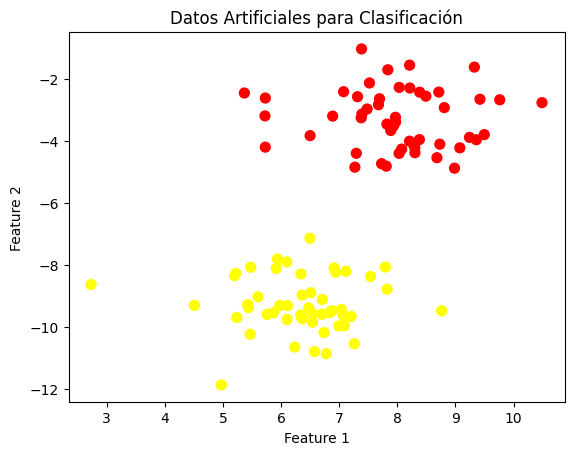

In [2]:
from sklearn.datasets import make_blobs
#Generación de datos sintéticos:** Utiliza `make_blobs` de `sklearn.datasets` para crear un conjunto de datos de dos clases (centros=2) con 100 muestras.  Los datos se almacenan en `X` (características) e `y` (etiquetas de clase). `random_state=6` asegura que la generación de datos sea reproducible.
# Crear datos artificiales
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

#**Visualización de datos:** Utiliza `matplotlib.pyplot` para visualizar los datos generados en un gráfico de dispersión 2D.  Cada punto representa una muestra, y su color indica la clase a la que pertenece (`c=y`). El gráfico muestra dos grupos de puntos, correspondientes a las dos clases generadas, lo que se espera de datos creados con `make_blobs`.
# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datos Artificiales para Clasificación')
plt.show()


### 4. Clasificación con SVM (Kernel Lineal)

Primero, probaremos el kernel lineal.


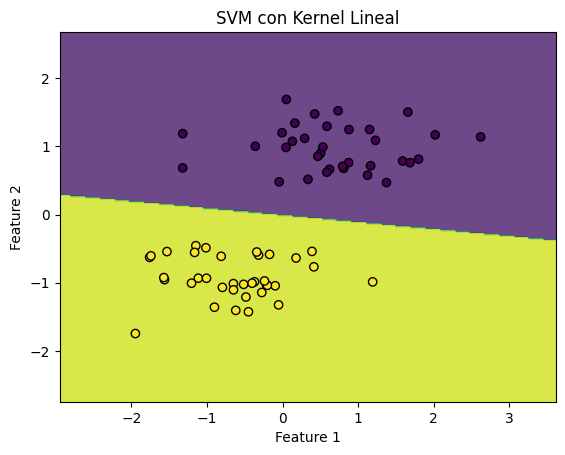

In [3]:
#3. Clasificación con SVM (Kernel Lineal):**

#División de datos:** `train_test_split` divide los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba).
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estándarizar características
#Escalado de características:** 'StandardScaler' estandariza las características (media 0, desviación estándar 1).  Esencial para muchos algoritmos de aprendizaje automático, incluyendo SVM.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo SVM con kernel lineal
#Creación del modelo SVM:** `SVC(kernel='linear')` crea un modelo SVM con un kernel lineal.
svm_linear = SVC(kernel='linear')
#Entrenamiento:** `svm_linear.fit(X_train, y_train)` entrena el modelo con los datos de entrenamiento.
svm_linear.fit(X_train, y_train)

# Predicción
#Predicción:** `y_pred = svm_linear.predict(X_test)` predice las etiquetas para los datos de prueba.

y_pred = svm_linear.predict(X_test)

# Visualización del límite de decisión:**
# 'plot_decision_boundary(...)': Función para visualizar el límite de decisión del modelo SVM entrenado.
# Crea una malla de puntos en el espacio de características y predice la clase para cada punto. Luego, dibuja las regiones de decisión en el gráfico, mostrando claramente cómo el modelo clasifica los datos.

# Visualización del límite de decisión
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM con Kernel Lineal')
    plt.show()

plot_decision_boundary(X_train,y_train, svm_linear)

#En resumen:**  El código genera datos de prueba artificiales, los divide en conjuntos de entrenamiento y prueba, escala los datos, entrena un modelo SVM con un kernel lineal, y finalmente visualiza el límite de decisión para entender cómo el modelo clasifica los datos. La función `plot_decision_boundary` es clave para la visualización de cómo separa las clases el modelo.



### 5. Clasificación con SVM (Kernel Polinómico)

Ahora probaremos con un kernel polinómico.

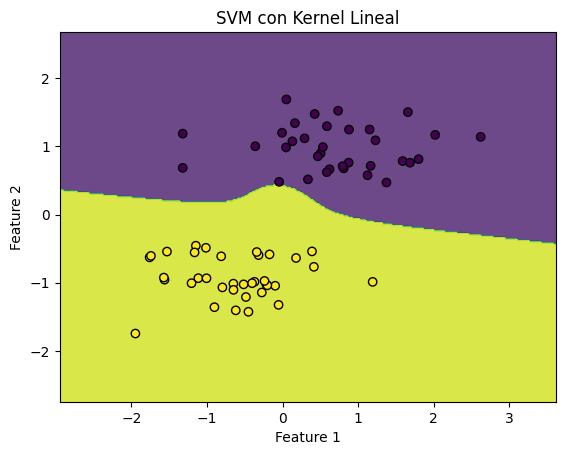

In [4]:
#**Clasificación con SVM (Kernel Polinomial):**
#  - Se repiten los pasos 3, pero utilizando un kernel polinomial de grado 3 (`SVC(kernel='poly', degree=3)`).
#  - Se visualiza el límite de decisión para este modelo.

# Crear el modelo SVM con kernel polinómico
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)

# Predicción
y_pred_poly = svm_poly.predict(X_test)

# Visualización del límite de decisión
plot_decision_boundary(X_train,y_train, svm_poly)


### 6. Clasificación con SVM (Kernel Gaussiano/RBF)

Por último, usaremos un kernel gaussiano (RBF).


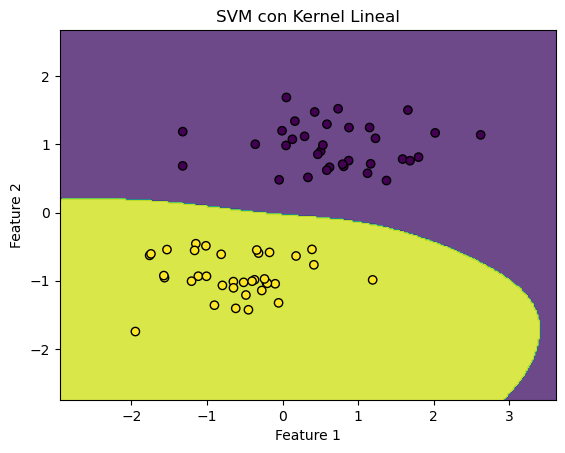

In [ ]:
# Impacto de usar kernel='rbf'
# El kernel RBF (Radial Basis Function) es un kernel no lineal que mapea los datos a un espacio de características de mayor dimensión, donde se puede encontrar un hiperplano que separe las clases.

# Diferencias con otros kernels:

# Kernel lineal: Busca un hiperplano que separe linealmente las clases en el espacio original. Solo funciona bien con datos linealmente separables.
# Kernel polinomial:  Similar al RBF, mapea a un espacio de mayor dimensión, pero usando una función polinomial. El grado del polinomio determina la complejidad del límite de decisión. Puede ser sensible a la elección del grado.
# Kernel RBF:  Es más flexible que el polinomial porque no requiere elegir un grado.  Utiliza una función gaussiana para calcular la similitud entre los datos. La elección del parámetro gamma controla la amplitud de la función gaussiana, y por lo tanto, la complejidad del límite de decisión.

# En resumen, el kernel 'rbf' permite crear límites de decisión no lineales más flexibles, mientras que los kernels lineales y polinomiales son más restrictivos. La mejor opción depende de los datos. Un kernel RBF con un valor de gamma adecuado puede ser útil para datasets donde las clases no son linealmente separables y un kernel lineal puede proporcionar una separación simple y rápida en conjuntos de datos donde sea aplicable.

# En el ejemplo, el kernel rbf permite generar un limite de decisión no lineal para clasificar los datos creados por make_blobs, mientras que el lineal y polinomial generarán un limite de decisión que busca separar los datos con un hiperplano.

# Crear el modelo SVM con kernel gaussiano
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Predicción
y_pred_rbf = svm_rbf.predict(X_test)

# Visualización del límite de decisión
plot_decision_boundary(X_train, y_train, svm_rbf)


### 7. Datos Artificiales para Regresión

Ahora crearemos algunos datos artificiales para regresión.


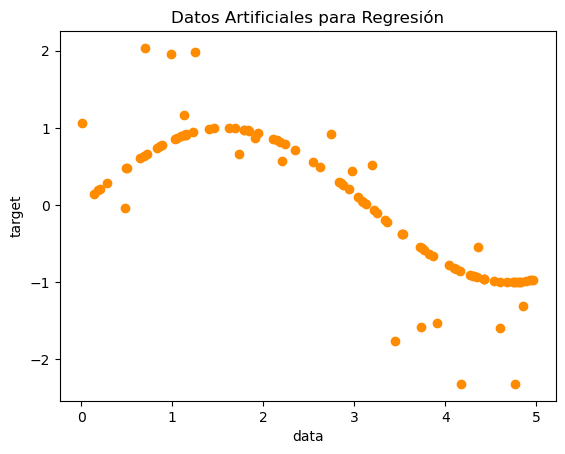

In [ ]:
# Crear datos artificiales
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Agregar ruido al modelo
y[::5] += 3 * (0.5 - np.random.rand(20))

# Visualización de los datos
plt.scatter(X, y, color='darkorange', label='data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Datos Artificiales para Regresión')
plt.show()

### 8. Regresión con SVM (Kernel Lineal)

Primero probaremos el kernel lineal para regresión.


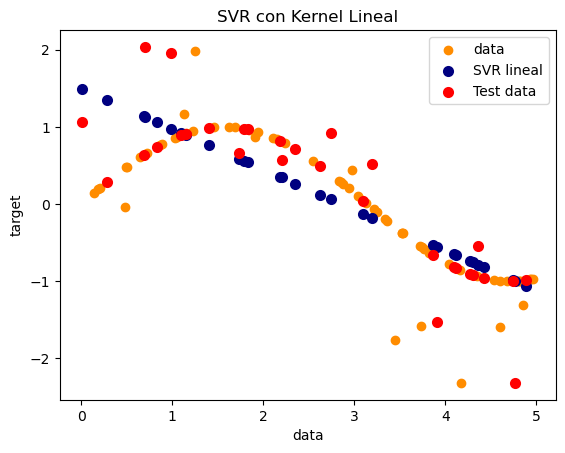

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo SVR con kernel lineal
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)

# Predicción
y_pred = svr_linear.predict(X_test)

# Visualización de ajuste
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.scatter(X_test, y_pred, color='navy', lw=2, label='SVR lineal')
plt.scatter(X_test, y_test, color='red', lw=2, label='Test data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR con Kernel Lineal')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For each kernel
accuracy = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {accuracy}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.7269004565077304
Mean Absolute Error: 0.4053367604962918
Mean Squared Error: 0.2868477371154904


### 9. Regresión con SVM (Kernel Polinómico)

Ahora probaremos con un kernel polinómico.

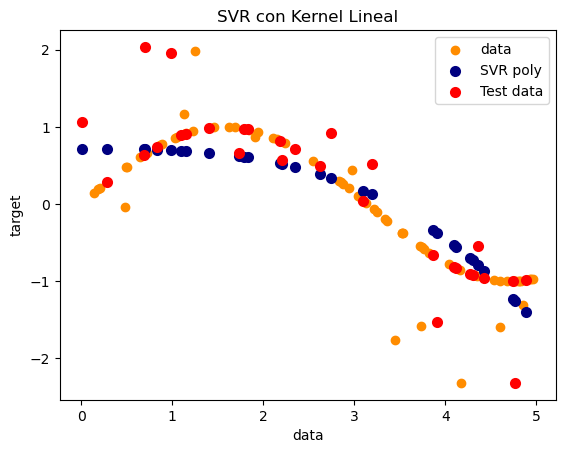

In [ ]:
# Crear el modelo SVR con kernel polinómico
svr_poly = SVR(kernel='poly', degree=3)
svr_poly.fit(X_train, y_train)

# Predicción
y_pred_poly = svr_poly.predict(X_test)


# Visualización de ajuste
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.scatter(X_test, y_pred_poly, color='navy', lw=2, label='SVR poly')
plt.scatter(X_test, y_test, color='red', lw=2, label='Test data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR con Kernel Lineal')
plt.legend()
plt.show()

In [ ]:
# For each kernel
accuracy = r2_score(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)

print(f"R² Score: {accuracy}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.7501638953884484
Mean Absolute Error: 0.37487587739447015
Mean Squared Error: 0.26241318583383516


### 10. Regresión con SVM (Kernel Gaussiano/RBF)

Por último, usaremos un kernel gaussiano (RBF).


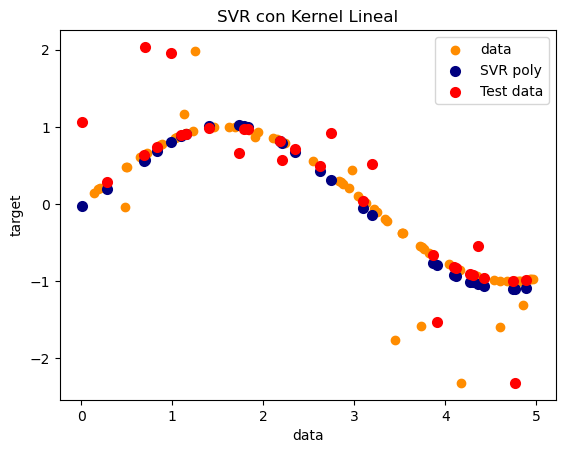

In [ ]:
# Crear el modelo SVR con kernel gaussiano
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)

# Predicción
y_pred_rbf = svr_rbf.predict(X_test)

# Visualización de ajuste
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.scatter(X_test, y_pred_rbf, color='navy', lw=2, label='SVR poly')
plt.scatter(X_test, y_test, color='red', lw=2, label='Test data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR con Kernel Lineal')
plt.legend()
plt.show()

In [ ]:
# For each kernel
accuracy = r2_score(y_test, y_pred_rbf)
mae = mean_absolute_error(y_test, y_pred_rbf)
mse = mean_squared_error(y_test, y_pred_rbf)

print(f"R² Score: {accuracy}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.7462759159461463
Mean Absolute Error: 0.3101601723614366
Mean Squared Error: 0.26649689132346915


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

#  With the Kernels already defined
kernels = ['linear', 'poly', 'rbf']
results = []

for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)

    results.append({
        'Kernel': kernel,
        'R² Score': r2_score(y_test, y_pred),
        'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': mean_squared_error(y_test, y_pred)
    })

# Create DataFrame
results_df = pd.DataFrame(results)
print(results_df)

   Kernel  R² Score  Mean Absolute Error  Mean Squared Error
0  linear  0.726900             0.405337            0.286848
1    poly  0.750164             0.374876            0.262413
2     rbf  0.746276             0.310160            0.266497
